In [ ]:
import pandas as pd
data = pd.read_csv('/content/data_no_outliers.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall Score,Pass/Fail
0,1.0,0.25,0.0,1.0,1.0,0.602410,0.525641,0.5625,0.527027,1
1,1.0,0.00,0.2,1.0,0.0,0.313253,0.282051,0.2250,0.202703,0
2,1.0,1.00,0.4,0.0,0.0,0.903614,0.743590,0.7875,0.797297,1
3,0.0,0.50,0.4,0.0,0.0,0.686747,0.615385,0.6375,0.608108,1
4,0.0,0.75,0.6,0.0,1.0,0.771084,0.858974,0.9000,0.824324,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

#import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Check the class distribution before oversampling
print("Class distribution before oversampling:")
print(data['Pass/Fail'].value_counts())

# Assuming data is your DataFrame
# X should be the features, and y should be the target variable
X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify the desired sampling strategy for RandomOverSampler (1:1 ratio)
sampling_strategy = 1.0
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution before oversampling:
1    674
0    235
Name: Pass/Fail, dtype: int64

Class distribution after oversampling:
0    473
1    473
Name: Pass/Fail, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# ... (your previous code for oversampling)

# Initialize and train the Support Vector Machines (SVM) classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))



Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        72
           1       0.99      0.95      0.97       201

    accuracy                           0.96       273
   macro avg       0.93      0.97      0.95       273
weighted avg       0.96      0.96      0.96       273



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Print additional metrics
print("\nAdditional Metrics for SVM:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Additional Metrics for SVM:
Accuracy: 0.9560439560439561
Precision: 0.9947643979057592
Recall: 0.945273631840796
F1 Score: 0.9693877551020408



Confusion Matrix for SVM:
[[ 71   1]
 [ 11 190]]


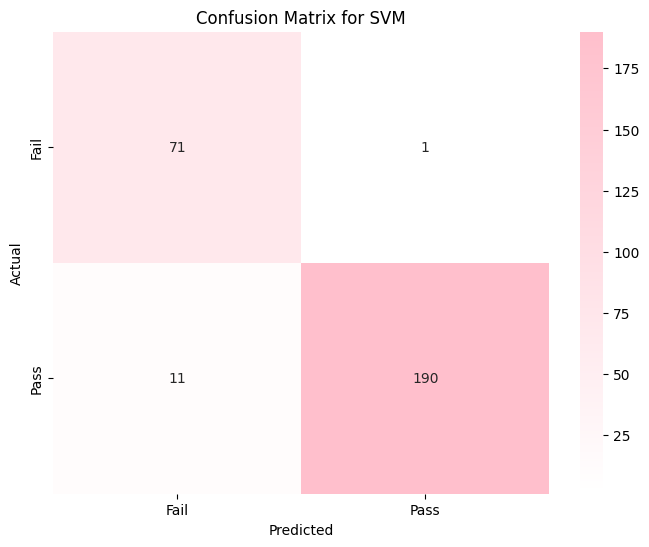

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# ... (your previous code for oversampling)

# Obtain the confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for SVM:")
print(conf_matrix_svm)

# Create a custom colormap from white to pink
cmap_colors = [(1, 1, 1), (1, 0.75, 0.8)]  # (white, pink)
custom_cmap = LinearSegmentedColormap.from_list("custom_pink", cmap_colors, N=256)

# Plot the confusion matrix as a heatmap for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap=custom_cmap, fmt='d', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.savefig('naive_bayes.png', bbox_inches='tight')
plt.show()
